In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import pickle
from Bio import Phylo, AlignIO, SeqIO
import seaborn as sns

In [3]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.font_manager

In [4]:
# Get a list of all the clustered samples as defined by TreeGubbins
filtered_cluster_data=pd.read_csv('../vars/mab_upid_dropped_outgroup_and_outlier_distance_rooted_TreeGubbins_filtered.csv')
clustered_samples=list(filtered_cluster_data.BioSample)

In [8]:
# read in lists of samples within largest clusters
clusterA_list_path='../../metadata/clusters/mab_clusterA.txt'
clusterB_list_path='../../metadata/clusters/mab_clusterB.txt'
clusterC_list_path='../../metadata/clusters/mab_clusterC.txt'
clustA_list=[line.strip() for line in open(clusterA_list_path)]
clustB_list=[line.strip() for line in open(clusterB_list_path)]
clustC_list=[line.strip() for line in open(clusterC_list_path)]

In [9]:
# read in dates
dates_path='../../metadata/dates/mab_all_collection_years.txt'
dates=pd.read_csv(dates_path, sep='\t', index_col=0)
date_dict=dates.to_dict()['collection_year']

In [10]:
# get list of unclustered samples
unclustered_samples=pickle.load( open('../vars/unclustered_samples.p', 'rb'))

In [12]:
unclustered_dates=[date_dict[sample] for sample in unclustered_samples]
clustered_dates=[date_dict[sample] for sample in clustered_samples]
clustA_dates=[date_dict[sample] for sample in clustA_list]
clustB_dates=[date_dict[sample] for sample in clustB_list]
clustC_dates=[date_dict[sample] for sample in clustC_list]

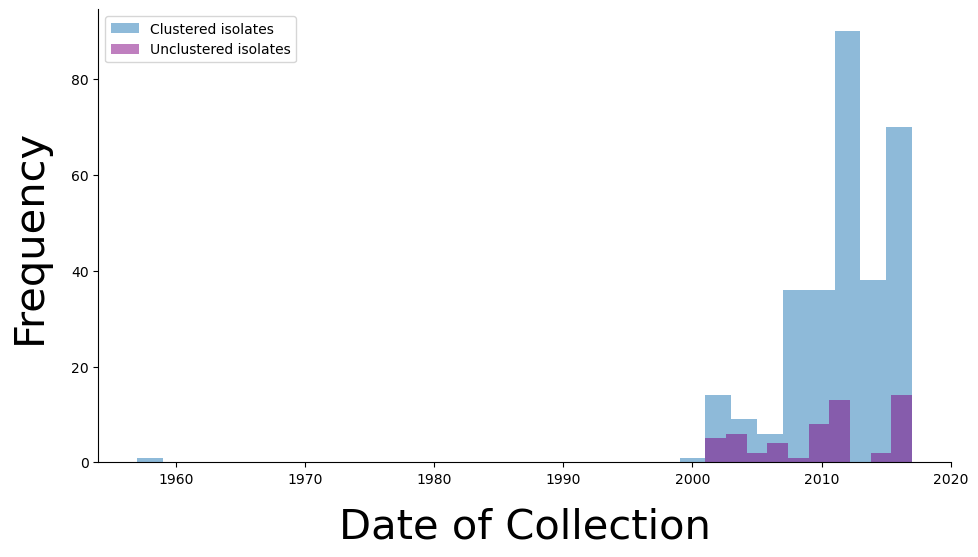

In [14]:
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.font_manager
matplotlib.rcParams['text.usetex'] = False
plt.figure(figsize=(11, 6), dpi=100)
plt.hist(clustered_dates, bins=30, alpha=0.5, label='Clustered isolates')
plt.hist(unclustered_dates, bins=10, alpha=0.5, label="Unclustered isolates", color='purple')
plt.xlabel("Date of Collection", fontsize=30, fontname="Arial", labelpad=15)
plt.ylabel("Frequency", fontsize=30, fontname="Arial", labelpad=15)
sns.despine()
plt.legend()